In [1]:
from scipy.sparse import coo_matrix
from matplotlib import pyplot
import numpy

%matplotlib inline

(0.0, 100.0)

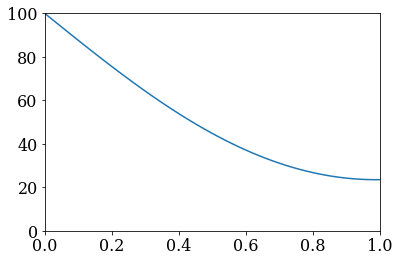

In [2]:
pyplot.rc('font', family='serif', size=16)
# set parameters
L = 1.0
nx = 51
dx = L / (nx-1)
x = numpy.linspace(0.0, L, num=nx)

alpha = 1.22e-3
q = 0.0

# set initial conditions
T0 = numpy.zeros(nx)
T0[0] = 100.0

def btcs(u0, nt, dt, dx, alpha, q=0.0):
    u = u0.copy()
    sigma = alpha * dt / dx**2
    A = lhs_operator(u0.size - 2, sigma)
    for n in range(nt):
        b = rhs_vector(u, sigma, q * dx)
        u[1:-1] = numpy.linalg.solve(A, b)
        # update boundary values
        u[0] = u0[0]
        u[-1] = u[-2] + q * dx
    return u

def lhs_operator(N, sigma):
    # diagonal coefficients
    row_D=numpy.array(numpy.arange(0,N,1))
    col_D=numpy.array(numpy.arange(0,N,1))
    data_D=numpy.array((2 + 1 / sigma) * numpy.ones(N))
    D = coo_matrix((data_D, (row_D, col_D)), shape=(N, N)).toarray()
    D[-1, -1] = 1 + 1 / sigma
    # upper diagonal
    row_U=numpy.array(numpy.arange(0,N-1,1))
    col_U=numpy.array(numpy.arange(1,N,1))
    data_U=numpy.array(-1.0 * numpy.ones(N - 1))
    U = coo_matrix((data_U, (row_U, col_U)), shape=(N, N)).toarray()
    # lower diagonal
    row_L=numpy.array(numpy.arange(1,N,1))
    col_L=numpy.array(numpy.arange(0,N-1,1))
    data_L=numpy.array(-1.0 * numpy.ones(N - 1))
    L = coo_matrix((data_L, (row_L, col_L)), shape=(N, N)).toarray()
    # assemble A
    A = D + U + L
    return A

def rhs_vector(T, sigma, qdx):
    b = T[1:-1] / sigma
    # dirichlet
    b[0] += T[0]
    # neumann
    b[-1] += qdx
    return b
nt = 1000
sigma = 0.5
dt = sigma * dx**2 / alpha

T = btcs(T0, nt, dt, dx, alpha, q=0.0)

pyplot.plot(x, T)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0)